## **Análisis Bivariado**

#### 📘 **Importación de librerías** 
Importamos las librerías que necesitaremos en nuestro análisis **bivariado**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from statistics import mode
from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats import chi2_contingency
import seaborn as sns

#### 🛜 **Importación del dataset Telco preparado**

Este dataset proviene de la cartera morosa de una empresa de telecomunicaciones que da servicio al Valle y al Tolima y se le realizó una preparación previa en el archivo `Univariado.ipynb` 

In [50]:
## Cargar datos 
df = pd.read_csv("./data/dataset_deudamorosa.csv", sep=';')

## respaldo - backup 
df_original = df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75882 entries, 0 to 75881
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TARIFA_PS                 75882 non-null  object 
 1   ESTADO_CLIENTE            75882 non-null  object 
 2   ESTADO_SUMINISTRO         75882 non-null  object 
 3   ESTADO_FACTURACION        75882 non-null  object 
 4   DEUDA                     75882 non-null  int64  
 5   ANTIGUEDAD_SALDO          75882 non-null  int64  
 6   CICLO                     75882 non-null  int64  
 7   ZONA                      75882 non-null  float64
 8   CLASE_SERVICIO            75882 non-null  object 
 9   ESTRATO                   75882 non-null  int64  
 10  DEPTO                     75882 non-null  object 
 11  MUNICIPIO                 75882 non-null  object 
 12  BARRIO                    75882 non-null  object 
 13  TOTAL_FACTURADO           75882 non-null  float64
 14  FECHA_

#### **Variable Categórica `ES_MOROSO`** 
El análisis en el archivo **Univariado.ipynb** fue fundamental para:  

- **Eliminar sesgos críticos**  
Se filtraron una cantidad masiva de valores de deudas en cero o negativas, ya que no representan cartera a recuperar. Al igual que outliers atípicos de deudas extremadamente grandes. 

- **Distribución representativa**  
Al depurar los datos, la distribución de la deuda restante refleja mejor la distribución de los datos objetivos reales para estrategias de recaudo: **clientes con deuda a recuperar.** 

No obstante, de acuerdo a las reglas de negocio, un cliente se califica como **moroso** y candidato a **suspensión del servicio** cuando su **`ANTIGUEDAD_SALDO`** es mayor a 2 meses, es decir, cuando lleva más de dos meses sin pagar sus facturas. 

Por esa razón, se crea la variable binaria **`ES_MOROSO`** para clasificar el estado real de morosidad. 


In [51]:
## Visualización de los valores de antiguedad saldo
df['ANTIGUEDAD_SALDO'].value_counts()

ANTIGUEDAD_SALDO
1     32393
2     11514
3      6781
9      3971
8      3877
4      3844
5      2951
7      2887
6      2882
10     2267
0       976
11      836
12      360
13      197
14       89
15       33
16       17
17        3
20        1
24        1
18        1
21        1
Name: count, dtype: int64

In [52]:
df['ES_MOROSO'] = (df['ANTIGUEDAD_SALDO'] > 2).astype(int)
df['ES_MOROSO'].value_counts()

ES_MOROSO
0    44883
1    30999
Name: count, dtype: int64

In [53]:
df['ES_MOROSO'].describe()

count    75882.000000
mean         0.408516
std          0.491563
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ES_MOROSO, dtype: float64

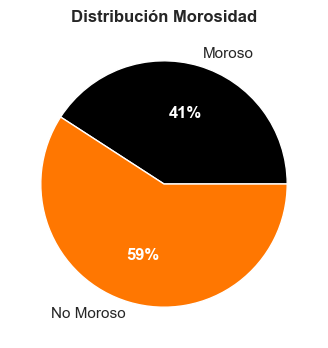

In [54]:
counts = [(df["ES_MOROSO"] == 1).sum(), (df["ES_MOROSO"] == 0).sum()]
total = sum(counts)
percentages = [f'{(count/total)*100:.0f}%' for count in counts]

plt.figure(figsize=(6, 4))
plt.title("Distribución Morosidad", fontsize=12, fontweight='bold')

wedges, texts, autotexts = plt.pie(
    counts, 
    labels=["Moroso", "No Moroso"], 
    autopct=lambda p: f'{p:.0f}%',
    colors=['#000000', '#ff7701']
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.grid(True, alpha=0.3)
plt.show()

#### **Interpretación de `ES_MOROSO`**  
- **Media: 0.4085:**  
El **40.85%** de los clientes con deuda activa son clientes morosos (candidatos a suspensión o que ya se encuentran suspendidos). 

- **Desviación estándar: 0.49**  
**Std < 0.5** indica que los datos están dispersos y que es una buena muestra (no existen sesgos). 



---
#### '

In [63]:
print("🔎 ANÁLISIS FOCALIZADO - VARIABLES CLAVE vs MOROSIDAD")
print("="*60)

for variable in TOP_CATEGORICAL_FEATUTRES:
    print(f"\n📊 VARIABLE: {variable}")
    print("-" * 40)
    
    # Tabla de contingencia básica
    tabla = pd.crosstab(df[variable], df['ES_MOROSO'])
    print("Tabla de Contingencia:")
    print(tabla)
    
    # Tabla de porcentajes por fila (LA MÁS IMPORTANTE)
    tabla_porcentaje = pd.crosstab(df[variable], df['ES_MOROSO'], normalize='index') * 100
    print(f"\n📈 % de Morosidad por {variable}:")
    print(tabla_porcentaje.round(1))
    
    # Test Chi-cuadrado
    chi2, p_value, dof, expected = chi2_contingency(tabla)
    
    print(f"\n🧪 Test Chi-Cuadrado:")
    print(f"Chi2 = {chi2:.2f}")
    print(f"Valor-p = {p_value:.6f}")
    
    if p_value < 0.05:
        print("✅ SIGNIFICATIVO: La variable está asociada a la morosidad")
    else:
        print("❌ NO significativo: No hay asociación estadística")
    
    print("="*40)

🔎 ANÁLISIS FOCALIZADO - VARIABLES CLAVE vs MOROSIDAD

📊 VARIABLE: TARIFA_PS
----------------------------------------
Tabla de Contingencia:
ES_MOROSO                                               0     1
TARIFA_PS                                                      
101-PLAN 100 MEGAS 2023                              1626  1450
102-PLAN 200 MEGAS 2023                              2014  1621
103-PLAN 400 MEGAS 2023                               280   189
104-PLAN 600 MEGAS 2023                                84    61
111-PLAN 100 MEGAS 2024                              5236  4857
112-PLAN 200 MEGAS 2024                              6333  4896
113-PLAN 400 MEGAS 2024                              1077   637
114-PLAN 600 MEGAS 2024                               278   148
120-PLAN 50 MEGAS PARA RETENCIÓN                       75    50
121-PLAN 100 MEGAS 2022                               125   200
122-PLAN 100 MEGAS PA 2022                              3     1
123-PLAN 100 MEGAS PB 2022  